In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Suicide data import and cleanup

In [2]:
#Import, read, and output the suicide rate by state csv
sui_state = "suicide_rate_state.csv"
sui_state_df = pd.read_csv(sui_state)
sui_state_df

,Unnamed: 0,State,Year,Deaths,Population,Crude Rate
0,NaN,Alabama,1999,554,4430141,12.5
1,NaN,Alabama,2000,582,4447100,13.1
2,NaN,Alabama,2001,512,4467634,11.5
3,NaN,Alabama,2002,513,4480089,11.5
4,NaN,Alabama,2003,520,4503491,11.5
...,...,...,...,...,...,...
1117,NaN,Wyoming,2016,144,585501,24.6
1118,NaN,Wyoming,2017,157,579315,27.1
1119,NaN,Wyoming,2018,147,577737,25.4
1120,NaN,Wyoming,2019,170,578759,29.4


In [3]:
#Rename columns
sui_state_df = sui_state_df.rename(columns = {"Crude Rate": 'Suicide Rate'})
sui_state_df

,Unnamed: 0,State,Year,Deaths,Population,Suicide Rate
0,NaN,Alabama,1999,554,4430141,12.5
1,NaN,Alabama,2000,582,4447100,13.1
2,NaN,Alabama,2001,512,4467634,11.5
3,NaN,Alabama,2002,513,4480089,11.5
4,NaN,Alabama,2003,520,4503491,11.5
...,...,...,...,...,...,...
1117,NaN,Wyoming,2016,144,585501,24.6
1118,NaN,Wyoming,2017,157,579315,27.1
1119,NaN,Wyoming,2018,147,577737,25.4
1120,NaN,Wyoming,2019,170,578759,29.4


In [4]:
#Drop NA column
clean_sui_state_df = sui_state_df.drop(columns = ["Unnamed: 0"], axis = 1)
clean_sui_state_df

,State,Year,Deaths,Population,Suicide Rate
0,Alabama,1999,554,4430141,12.5
1,Alabama,2000,582,4447100,13.1
2,Alabama,2001,512,4467634,11.5
3,Alabama,2002,513,4480089,11.5
4,Alabama,2003,520,4503491,11.5
...,...,...,...,...,...
1117,Wyoming,2016,144,585501,24.6
1118,Wyoming,2017,157,579315,27.1
1119,Wyoming,2018,147,577737,25.4
1120,Wyoming,2019,170,578759,29.4


In [5]:
clean_sui_state_df.dtypes

State            object
Year              int64
Deaths            int64
Population        int64
Suicide Rate    float64
dtype: object

# Unemployment data import and cleanup

In [7]:
#Import, read, and output the unemployment CSV file 
unemployed = "emp-unemployment_LAU_and USBLS.csv"
unemployed_df = pd.read_csv(unemployed)
unemployed_df

,Fips,Area,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,00000,United States,7.1,7.6,9.7,9.6,7.5,7.2,7.0,6.2,...,9.3,9.6,8.9,8.1,7.4,6.2,5.3,4.9,4.4,3.9
1,01000,Alabama,8.9,10.6,14.1,13.8,11.0,9.2,9.7,8.1,...,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9
2,02000,Alaska,9.6,9.4,9.9,9.9,9.8,9.7,10.9,10.3,...,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6
3,04000,Arizona,6.6,6.2,10.1,8.8,5.2,6.3,6.9,6.5,...,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8
4,05000,Arkansas,7.6,8.7,9.9,9.9,8.7,8.7,8.6,8.1,...,7.8,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Average Annual Unemployment Rates by State (se...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,U.S. Bureau of Labor Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Local Area Unemployment Statistics and Current...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,April 2019 release,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Drop NA column
clean_unemploy_df = unemployed_df.dropna()
clean_unemploy_df

,Fips,Area,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,00000,United States,7.1,7.6,9.7,9.6,7.5,7.2,7.0,6.2,...,9.3,9.6,8.9,8.1,7.4,6.2,5.3,4.9,4.4,3.9
1,01000,Alabama,8.9,10.6,14.1,13.8,11.0,9.2,9.7,8.1,...,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9
2,02000,Alaska,9.6,9.4,9.9,9.9,9.8,9.7,10.9,10.3,...,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6
3,04000,Arizona,6.6,6.2,10.1,8.8,5.2,6.3,6.9,6.5,...,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8
4,05000,Arkansas,7.6,8.7,9.9,9.9,8.7,8.7,8.6,8.1,...,7.8,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7
5,06000,California,6.8,7.4,10.0,9.8,7.8,7.2,6.7,5.8,...,11.2,12.2,11.7,10.4,8.9,7.5,6.2,5.5,4.8,4.2
6,08000,Colorado,5.8,5.7,7.3,7.1,5.4,6.1,7.5,7.5,...,7.3,8.7,8.4,7.9,6.9,5.0,3.9,3.2,2.7,3.3
7,09000,Connecticut,5.8,6.2,6.9,6.0,4.7,4.7,3.8,3.4,...,7.9,9.1,8.8,8.3,7.8,6.6,5.7,5.1,4.7,4.1
8,10000,Delaware,7.6,7.8,8.4,7.7,6.3,5.1,4.3,3.1,...,8.3,8.4,7.5,7.2,6.7,5.7,4.9,4.5,4.5,3.8
9,11000,District of Columbia,7.4,8.9,10.4,11.2,9.1,8.1,7.5,6.3,...,9.3,9.4,10.2,9.0,8.5,7.8,6.9,6.1,6.1,5.6


In [9]:
#Rename columns as needed
clean_unemploy_df = clean_unemploy_df.rename(columns = {"Area": "State"})
clean_unemploy_df.head()

,Fips,State,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,00000,United States,7.1,7.6,9.7,9.6,7.5,7.2,7.0,6.2,...,9.3,9.6,8.9,8.1,7.4,6.2,5.3,4.9,4.4,3.9
1,01000,Alabama,8.9,10.6,14.1,13.8,11.0,9.2,9.7,8.1,...,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9
2,02000,Alaska,9.6,9.4,9.9,9.9,9.8,9.7,10.9,10.3,...,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6
3,04000,Arizona,6.6,6.2,10.1,8.8,5.2,6.3,6.9,6.5,...,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8
4,05000,Arkansas,7.6,8.7,9.9,9.9,8.7,8.7,8.6,8.1,...,7.8,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7


In [10]:
#Drop unneccesary columns and remove "United States" and "District of Columbia" rows, as they are not states
clean_unemploy_df = clean_unemploy_df.drop(columns = {"Fips"}, axis = 1)
clean_unemploy_df = clean_unemploy_df.drop([0,9])
clean_unemploy_df

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Alabama,8.9,10.6,14.1,13.8,11.0,9.2,9.7,8.1,7.2,...,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9
2,Alaska,9.6,9.4,9.9,9.9,9.8,9.7,10.9,10.3,8.8,...,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6
3,Arizona,6.6,6.2,10.1,8.8,5.2,6.3,6.9,6.5,6.4,...,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8
4,Arkansas,7.6,8.7,9.9,9.9,8.7,8.7,8.6,8.1,7.6,...,7.8,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7
5,California,6.8,7.4,10.0,9.8,7.8,7.2,6.7,5.8,5.3,...,11.2,12.2,11.7,10.4,8.9,7.5,6.2,5.5,4.8,4.2
6,Colorado,5.8,5.7,7.3,7.1,5.4,6.1,7.5,7.5,6.5,...,7.3,8.7,8.4,7.9,6.9,5.0,3.9,3.2,2.7,3.3
7,Connecticut,5.8,6.2,6.9,6.0,4.7,4.7,3.8,3.4,3.0,...,7.9,9.1,8.8,8.3,7.8,6.6,5.7,5.1,4.7,4.1
8,Delaware,7.6,7.8,8.4,7.7,6.3,5.1,4.3,3.1,3.1,...,8.3,8.4,7.5,7.2,6.7,5.7,4.9,4.5,4.5,3.8
10,Florida,6.1,6.7,8.4,8.5,6.4,6.0,5.8,5.3,5.1,...,10.4,11.1,10.0,8.5,7.2,6.3,5.5,4.8,4.2,3.6
11,Georgia,6.3,6.4,7.8,7.7,6.1,6.4,6.0,5.7,5.7,...,9.9,10.5,10.2,9.2,8.2,7.1,6.0,5.4,4.7,3.9


In [11]:
#Melt the data so that years are in the dataframe and unemployment rate percent is in one column
clean_unemploy_melt_df = clean_unemploy_df.melt(id_vars=['State'], 
              value_vars=['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
                          '1997','1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'],
              var_name='Year', value_name='Unemployment Rate (%)')
clean_unemploy_melt_df

,State,Year,Unemployment Rate (%)
0,Alabama,1980,8.9
1,Alaska,1980,9.6
2,Arizona,1980,6.6
3,Arkansas,1980,7.6
4,California,1980,6.8
...,...,...,...
1945,Virginia,2018,3.0
1946,Washington,2018,4.5
1947,West Virginia,2018,5.3
1948,Wisconsin,2018,3.0


In [12]:
#Remove rows with years that do not match the suicide CSV
clean_unemploy_melt_df = clean_unemploy_melt_df.loc[(clean_unemploy_melt_df["Year"] > "1998")]

clean_unemploy_melt_df

,State,Year,Unemployment Rate (%)
950,Alabama,1999,4.7
951,Alaska,1999,6.5
952,Arizona,1999,4.4
953,Arkansas,1999,4.6
954,California,1999,5.2
...,...,...,...
1945,Virginia,2018,3.0
1946,Washington,2018,4.5
1947,West Virginia,2018,5.3
1948,Wisconsin,2018,3.0


In [13]:
clean_unemploy_melt_df.dtypes

State                     object
Year                      object
Unemployment Rate (%)    float64
dtype: object

In [14]:
#Change the "Year" from an object to an integer
clean_unemploy_melt_df["Year"] = clean_unemploy_melt_df["Year"].astype(int)

C:\Users\jadou\AppData\Local\Temp\ipykernel_12108\4173450843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_unemploy_melt_df["Year"] = clean_unemploy_melt_df["Year"].astype(int)


# Merged

In [17]:
#Merge the two dataframes to prepare for graphing
Merge_Unemp_Sui_df = pd.merge(clean_sui_state_df, clean_unemploy_melt_df, on = ["State", "Year"], how = 'inner')
Merge_Unemp_Sui_df

,State,Year,Deaths,Population,Suicide Rate,Unemployment Rate (%)
0,Alabama,1999,554,4430141,12.5,4.7
1,Alabama,2000,582,4447100,13.1,4.6
2,Alabama,2001,512,4467634,11.5,5.1
3,Alabama,2002,513,4480089,11.5,5.9
4,Alabama,2003,520,4503491,11.5,6.0
...,...,...,...,...,...,...
995,Wyoming,2014,120,584153,20.5,4.1
996,Wyoming,2015,157,586107,26.8,4.3
997,Wyoming,2016,144,585501,24.6,5.3
998,Wyoming,2017,157,579315,27.1,4.2


In [18]:
#Check dataframe types
Merge_Unemp_Sui.dtypes

State                     object
Year                       int64
Deaths                     int64
Population                 int64
Suicide Rate             float64
Unemployment Rate (%)    float64
dtype: object

# Graphing

### Graph Unenployment Rate vs Suicide Rate for all years

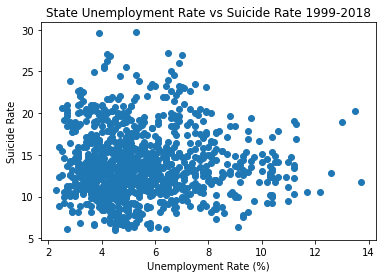

In [23]:
#Create a scatter plot of unemployment rate and suicide rates
plt.scatter(Merge_Unemp_Sui_df["Unemployment Rate (%)"], Merge_Unemp_Sui_df["Suicide Rate"])
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Suicide Rate")
plt.title("State Unemployment Rate vs Suicide Rate 1999-2018")
plt.show()

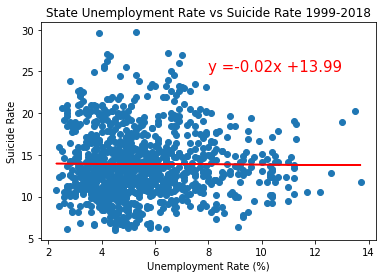

The r-value = -0.00775433235170951. The p-value = 0.8065257249946428
The r-squared value is 6.0129670220768735e-05


In [31]:
#Perform a linear regression
x_values = Merge_Unemp_Sui_df["Unemployment Rate (%)"]
y_values = Merge_Unemp_Sui_df["Suicide Rate"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.annotate(line_eq, (8, 25), fontsize = 15, color = "red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Suicide Rate")
plt.title("State Unemployment Rate vs Suicide Rate 1999-2018")
plt.show()
print(f"The r-value = {rvalue}. The p-value = {pvalue}")
print(f"The r-squared value is {rvalue**2}")

Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the slope of this regression line
is 0. Therefore, we can say that there is no statistical significance between unemployment and suicide rate.

In [33]:
#Try a regression test for a chosen year
year_regression_test = Merge_Unemp_Sui_df.loc[Merge_Unemp_Sui_df["Year"] == 2012]
year_regression_test

,State,Year,Deaths,Population,Suicide Rate,Unemployment Rate (%)
13,Alabama,2012,724,4822023,15.0,8.0
33,Alaska,2012,168,731449,23.0,7.1
53,Arizona,2012,1151,6553255,17.6,8.3
73,Arkansas,2012,485,2949131,16.4,7.6
93,California,2012,3887,38041430,10.2,10.4
113,Colorado,2012,1049,5187582,20.2,7.9
133,Connecticut,2012,367,3590347,10.2,8.3
153,Delaware,2012,125,917092,13.6,7.2
173,Florida,2012,2998,19317568,15.5,8.5
193,Georgia,2012,1165,9919945,11.7,9.2


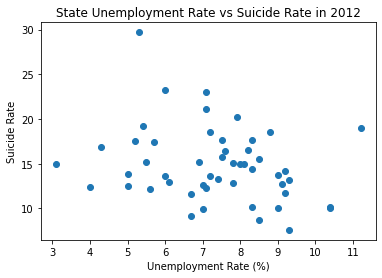

In [42]:
plt.scatter(year_regression_test["Unemployment Rate (%)"], year_regression_test["Suicide Rate"])
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Suicide Rate")
plt.title("State Unemployment Rate vs Suicide Rate in 2012")
plt.show()

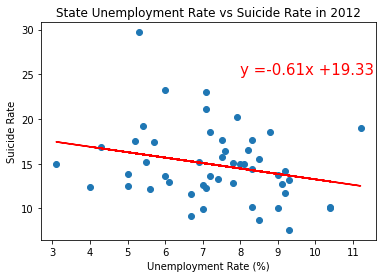

The r-value = -0.2521489572203212. The p-value = 0.07730650803532446
The r-squared value is 0.06357909662729537


In [43]:
x_values = year_regression_test["Unemployment Rate (%)"]
y_values = year_regression_test["Suicide Rate"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.annotate(line_eq, (8, 25), fontsize = 15, color = "red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Suicide Rate")
plt.title("State Unemployment Rate vs Suicide Rate in 2012")
plt.show()
print(f"The r-value = {rvalue}. The p-value = {pvalue}")
print(f"The r-squared value is {rvalue**2}")

Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the slope of this regression line is 0. Therefore, we can say that there is no statistical significance between unemployment and suicide rate.

In [37]:
#Try a regression test for a chosen state
state_regression_test = Merge_Unemp_Sui_df.loc[Merge_Unemp_Sui_df["State"] == "Minnesota"]

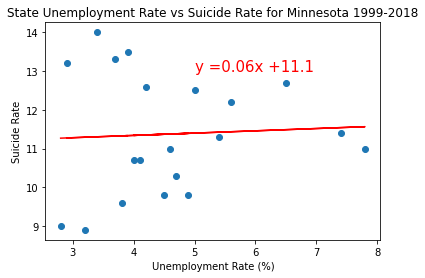

The r-value = 0.05228781142757257. The p-value = 0.8267040831066597
The r-squared value is 0.0027340152238853888


In [44]:
x_values = state_regression_test["Unemployment Rate (%)"]
y_values = state_regression_test["Suicide Rate"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.annotate(line_eq, (5, 13), fontsize = 15, color = "red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Suicide Rate")
plt.title("State Unemployment Rate vs Suicide Rate for Minnesota 1999-2018")
plt.show()
print(f"The r-value = {rvalue}. The p-value = {pvalue}")
print(f"The r-squared value is {rvalue**2}")

Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the slope of this regression line is 0. Therefore, we can say that there is no statistical significance between unemployment and suicide rate.